<a href="https://colab.research.google.com/github/Kateryna-Tiedieieva/Project/blob/main/Kateryna_Tiedieieva_7560_Python_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Build and train a simple Perceptron for the classification of a dataset

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

X = X[y != 2]
y = y[y != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the Perceptron model
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

# Train the model
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


2. Use a neural network to predict the price of a used car based on its properties

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Load the dataset
# Assuming the dataset is in a CSV file named 'used_car_data.csv'
df = pd.read_csv('used_cars.csv')

# Display the first few rows of the dataset
print(df.head())

# Preprocess the dataset
# Dropping irrelevant or missing data columns
df = df.drop(columns=['registration_year', 'insurance_validity', 'seats', 'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)', 'torque(Nm)'])

# Drop rows with missing target values
df = df.dropna(subset=['price(in lakhs)'])


# Encode categorical features
categorical_cols = ['ownsership', 'price(in lakhs)', 'transmission', 'car_name', 'fuel_type', 'kms_driven']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Separate features and target variable
X = df.drop('price(in lakhs)', axis=1)
y = df['price(in lakhs)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


   Unnamed: 0                                           car_name  \
0           0                    2017 Mercedes-Benz S-Class S400   
1           1  2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI   
2           2                       2018 BMW X1 sDrive 20d xLine   
3           3                           2019 Kia Seltos GTX Plus   
4           4                    2019 Skoda Superb LK 1.8 TSI AT   

  registration_year insurance_validity fuel_type  seats  kms_driven  \
0            Jul-17      Comprehensive    Petrol      5       56000   
1            Jan-21      Comprehensive    Petrol      5       30615   
2            Sep-18      Comprehensive    Diesel      5       24000   
3            Dec-19      Comprehensive    Petrol      5       18378   
4            Aug-19      Comprehensive    Petrol      5       44900   

    ownsership transmission manufacturing_year  mileage(kmpl)  engine(cc)  \
0  First Owner    Automatic               2017           7.81      2996.0   
1  First O

3. Build a neural network for binary classification of spam and non-spam emails

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_splitя
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('SMSSpamCollection.csv', sep='\t', names=["label", "message"])
# Handle missing or non-string entries in the 'message' column
df['message'] = df['message'].astype(str).fillna('')

# Encode the labels (spam = 1, ham = 0)
df['label'] = LabelEncoder().fit_transform(df['label'])

# Separate features and target variable
X = df['message']
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

# Build the neural network model
model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred = (model.predict(X_test_padded) > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Epoch 1/10
112/112 [==============================] - 2s 8ms/step - loss: -2882.3665 - accuracy: 2.8035e-04 - val_loss: -8286.7969 - val_accuracy: 0.0000e+00
Epoch 2/10
112/112 [==============================] - 1s 5ms/step - loss: -24473.8047 - accuracy: 2.8035e-04 - val_loss: -49213.8398 - val_accuracy: 0.0000e+00
Epoch 3/10
112/112 [==============================] - 1s 5ms/step - loss: -99184.3906 - accuracy: 2.8035e-04 - val_loss: -164180.7031 - val_accuracy: 0.0000e+00
Epoch 4/10
112/112 [==============================] - 1s 5ms/step - loss: -267720.5000 - accuracy: 2.8035e-04 - val_loss: -389590.7812 - val_accuracy: 0.0000e+00
Epoch 5/10
112/112 [==============================] - 1s 6ms/step - loss: -565867.3750 - accuracy: 2.8035e-04 - val_loss: -759086.7500 - val_accuracy: 0.0000e+00
Epoch 6/10
112/112 [==============================] - 1s 5ms/step - loss: -1023993.8750 - accuracy: 2.8035e-04 - val_loss: -1301066.6250 - val_accuracy: 0.0000e+00
Epoch 7/10
112/112 [=============

4. Use neural networks to classify images of hand-written digits.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.2f}')

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_test_classes = y_test.argmax(axis=-1)

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')


11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2659 - accuracy: 0.9232 - val_loss: 0.1445 - val_accuracy: 0.9587
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1114 - accuracy: 0.9663 - val_loss: 0.1048 - val_accuracy: 0.9686
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0755 - accuracy: 0.9767 - val_loss: 0.1028 - val_accuracy: 0.9703
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0558 - accuracy: 0.9817 - val_loss: 0.1029 - val_accuracy: 0.9711
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0441 - accuracy: 0.9858 - val_loss: 0.0958 - val_accuracy: 0.9745
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0359 - accuracy: 0.9883 - val_loss: 0.1106 - val_accuracy: 0.9716
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - 

5. Build a neural network for the prediction of housing prices based on its location, size, neighborhood, etc.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Load the Boston Housing Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=2)
print(f'Test MSE: {test_loss:.2f}')

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')


Epoch 1/100
413/413 [==============================] - 2s 2ms/step - loss: 0.9955 - val_loss: 0.4713
Epoch 2/100
413/413 [==============================] - 1s 2ms/step - loss: 0.4203 - val_loss: 0.4465
Epoch 3/100
413/413 [==============================] - 1s 2ms/step - loss: 0.4065 - val_loss: 0.3907
Epoch 4/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3682 - val_loss: 0.3824
Epoch 5/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3460 - val_loss: 0.3695
Epoch 6/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3443 - val_loss: 0.3688
Epoch 7/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3314 - val_loss: 0.3650
Epoch 8/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3470 - val_loss: 0.3516
Epoch 9/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3155 - val_loss: 0.3375
Epoch 10/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3331 - val_lo

6. Train a feedforward neural network to recognize images.

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2731 - accuracy: 0.9199 - val_loss: 0.1362 - val_accuracy: 0.9608
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1140 - accuracy: 0.9659 - val_loss: 0.1056 - val_accuracy: 0.9683
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0800 - accuracy: 0.9758 - val_loss: 0.1125 - val_accuracy: 0.9668
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0601 - accuracy: 0.9813 - val_loss: 0.0888 - val_accuracy: 0.9740
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0460 - accuracy: 0.9854 - val_loss: 0.0901 - val_accuracy: 0.9747
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0374 - accuracy: 0.9880 - val_loss: 0.0967 - val_accuracy: 0.9740
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - l

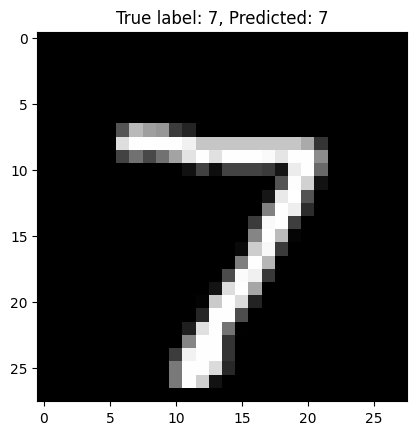

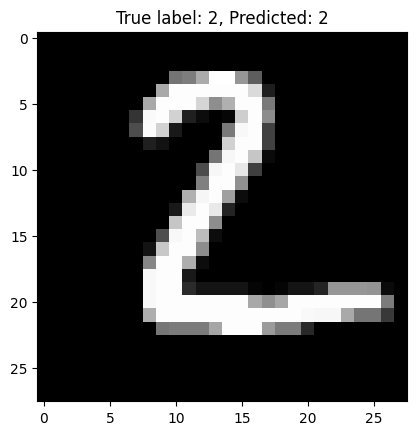

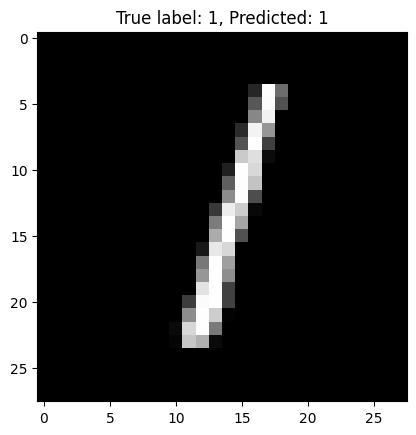

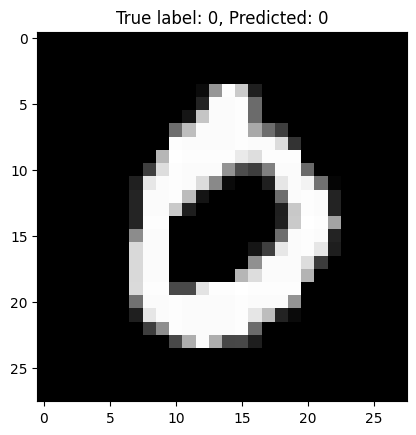

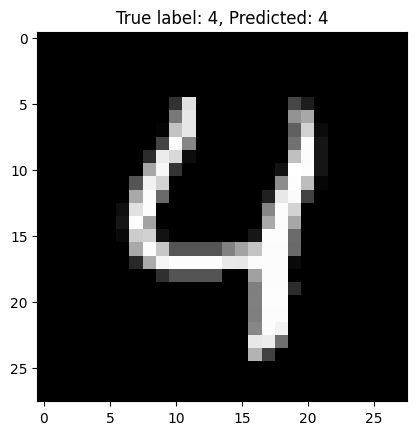

In [ ]:
!pip install tensorflow
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images to a range of [0, 1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D vector
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    Dense(64, activation='relu'),   # Second hidden layer with 64 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.2f}')
# Make predictions on the test set
predictions = model.predict(X_test)

# Show some predictions along with their true labels
def plot_sample(sample_idx):
    plt.imshow(X_test[sample_idx], cmap='gray')
    plt.title(f"True label: {np.argmax(y_test[sample_idx])}, Predicted: {np.argmax(predictions[sample_idx])}")
    plt.show()

for i in range(5):
    plot_sample(i)



7. Implement a convolutional neural network to classify images.

Epoch 1/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.1518 - accuracy: 0.9531 - val_loss: 0.0615 - val_accuracy: 0.9827
Epoch 2/10
1500/1500 [==============================] - 53s 35ms/step - loss: 0.0493 - accuracy: 0.9844 - val_loss: 0.0475 - val_accuracy: 0.9863
Epoch 3/10
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0323 - accuracy: 0.9898 - val_loss: 0.0411 - val_accuracy: 0.9886
Epoch 4/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0236 - accuracy: 0.9920 - val_loss: 0.0441 - val_accuracy: 0.9872
Epoch 5/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0179 - accuracy: 0.9940 - val_loss: 0.0466 - val_accuracy: 0.9878
Epoch 6/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0141 - accuracy: 0.9952 - val_loss: 0.0375 - val_accuracy: 0.9899
Epoch 7/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.0503 -

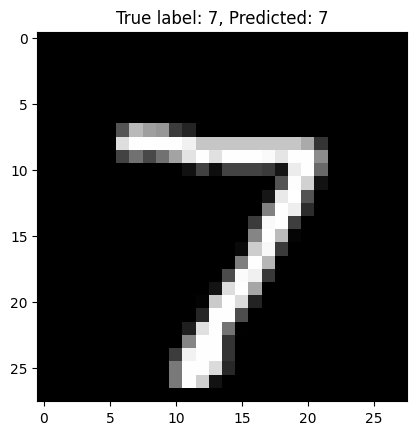

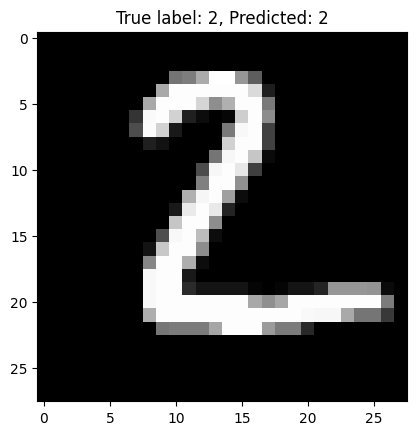

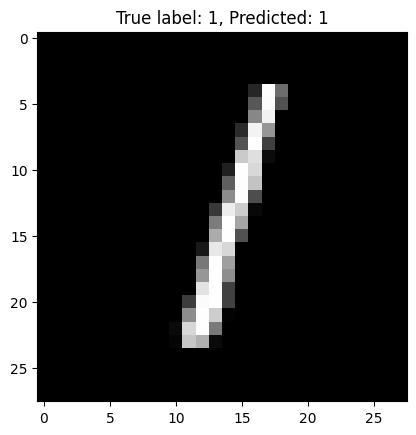

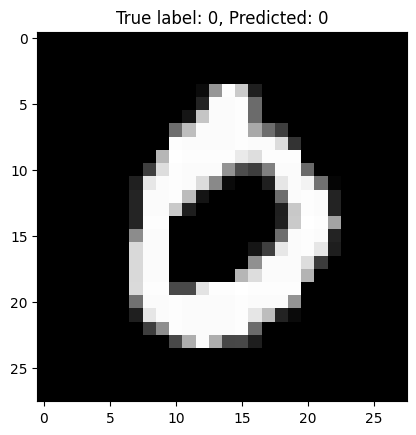

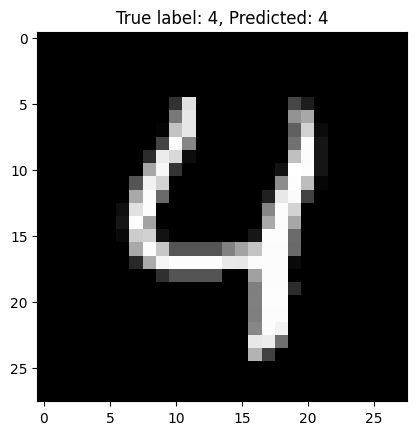

In [ ]:
!pip install tensorflow
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the data to fit the model
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Normalize the images to a range of [0, 1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.2f}')
# Make predictions on the test set
predictions = model.predict(X_test)

# Show some predictions along with their true labels
def plot_sample(sample_idx):
    plt.imshow(X_test[sample_idx].reshape(28, 28), cmap='gray')
    plt.title(f"True label: {np.argmax(y_test[sample_idx])}, Predicted: {np.argmax(predictions[sample_idx])}")
    plt.show()

for i in range(5):
    plot_sample(i)



8. Train a recurrent neural network to generate text.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
# Sample text
text = """A recurrent neural network (RNN) is one of the two broad types of artificial neural network, characterized by direction of the flow of information between its layers. In contrast to the uni-directional feedforward neural network, it is a bi-directional artificial neural network, meaning that it allows the output from some nodes to affect subsequent input to the same nodes. Their ability to use internal state (memory) to process arbitrary sequences of inputs makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition. The term "recurrent neural network" is used to refer to the class of networks with an infinite impulse response, whereas "convolutional neural network" refers to the class of finite impulse response. Both classes of networks exhibit temporal dynamic behavior. A finite impulse recurrent network is a directed acyclic graph that can be unrolled and replaced with a strictly feedforward neural network, while an infinite impulse recurrent network is a directed cyclic graph that cannot be unrolled.

Additional stored states and the storage under direct control by the network can be added to both infinite-impulse and finite-impulse networks. Another network or graph can also replace the storage if that incorporates time delays or has feedback loops. Such controlled states are referred to as gated states or gated memory and are part of long short-term memory networks (LSTMs) and gated recurrent units. This is also called Feedback Neural Network (FNN). Recurrent neural networks are theoretically Turing complete and can run arbitrary programs to process arbitrary sequences of inputs.
"""

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in text.split("\n"):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Create predictors and label
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)
# Build the model
model = Sequential([
    Embedding(total_words, 64, input_length=max_sequence_len-1),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(total_words, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=1)
def generate_text(seed_text, next_words, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted, axis=1)[0]
        output_word = tokenizer.index_word[predicted_word_index]
        seed_text += " " + output_word
    return seed_text

# Generate text
seed_text = "Your seed text"
generated_text = generate_text(seed_text, 20, max_sequence_len)
print(generated_text)


Epoch 1/100
8/8 [==============================] - 7s 246ms/step - loss: 4.8652 - accuracy: 0.0314
Epoch 2/100
8/8 [==============================] - 1s 177ms/step - loss: 4.8298 - accuracy: 0.0471
Epoch 3/100
8/8 [==============================] - 1s 180ms/step - loss: 4.7254 - accuracy: 0.0431
Epoch 4/100
8/8 [==============================] - 1s 176ms/step - loss: 4.6250 - accuracy: 0.0392
Epoch 5/100
8/8 [==============================] - 1s 185ms/step - loss: 4.5788 - accuracy: 0.0471
Epoch 6/100
8/8 [==============================] - 1s 178ms/step - loss: 4.5496 - accuracy: 0.0471
Epoch 7/100
8/8 [==============================] - 1s 187ms/step - loss: 4.5326 - accuracy: 0.0353
Epoch 8/100
8/8 [==============================] - 2s 232ms/step - loss: 4.5216 - accuracy: 0.0471
Epoch 9/100
8/8 [==============================] - 2s 288ms/step - loss: 4.5219 - accuracy: 0.0471
Epoch 10/100
8/8 [==============================] - 1s 173ms/step - loss: 4.5142 - accuracy: 0.0549
Epoch 11/

9. Implement a deep autoencoder to compress data.

Epoch 1/50
235/235 [==============================] - 11s 36ms/step - loss: 0.2146 - val_loss: 0.1359
Epoch 2/50
235/235 [==============================] - 7s 30ms/step - loss: 0.1231 - val_loss: 0.1117
Epoch 3/50
235/235 [==============================] - 8s 36ms/step - loss: 0.1078 - val_loss: 0.1020
Epoch 4/50
235/235 [==============================] - 7s 28ms/step - loss: 0.0999 - val_loss: 0.0959
Epoch 5/50
235/235 [==============================] - 8s 34ms/step - loss: 0.0953 - val_loss: 0.0925
Epoch 6/50
235/235 [==============================] - 6s 26ms/step - loss: 0.0922 - val_loss: 0.0905
Epoch 7/50
235/235 [==============================] - 8s 34ms/step - loss: 0.0896 - val_loss: 0.0882
Epoch 8/50
235/235 [==============================] - 7s 29ms/step - loss: 0.0877 - val_loss: 0.0863
Epoch 9/50
235/235 [==============================] - 8s 35ms/step - loss: 0.0861 - val_loss: 0.0847
Epoch 10/50
235/235 [==============================] - 7s 30ms/step - loss: 0.0849 - val_l

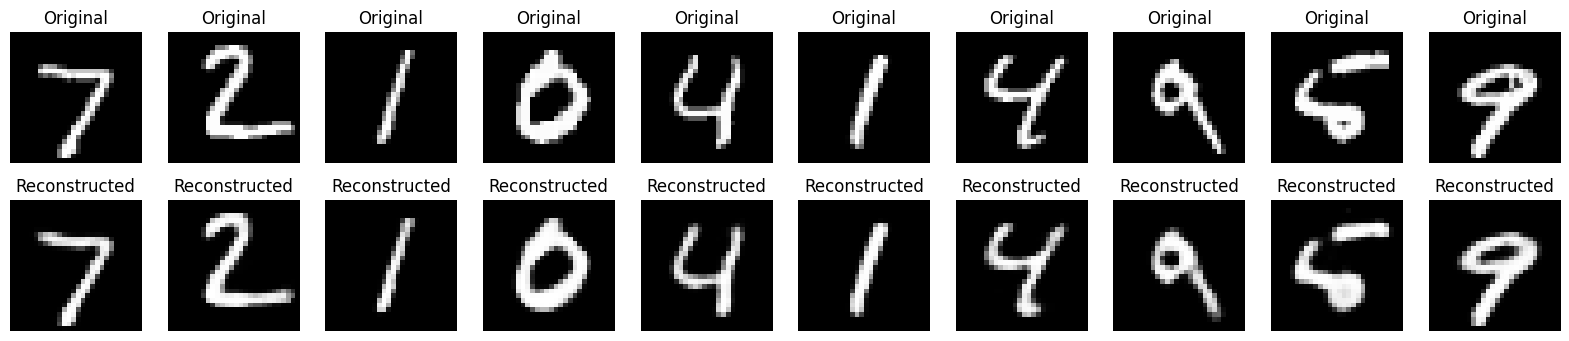

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt
# Load the MNIST dataset
(X_train, _), (X_test, _) = mnist.load_data()

# Normalize the data to a range of [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the images to 1D vectors
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
# Define the size of the input and the encoded representation
input_dim = X_train.shape[1]  # 28*28 = 784 for MNIST
encoding_dim = 64  # Size of the compressed representation

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(256, activation='relu')(input_layer)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))
# Encode and decode some digits
encoded_imgs = autoencoder.predict(X_test)

# Display the original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


10. Train a generative adversarial network to generate realistic images.

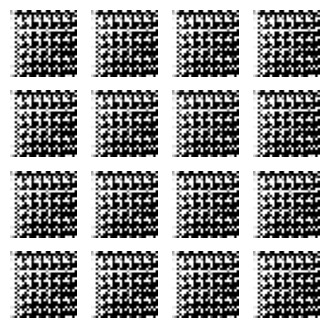

Epoch 1, d_loss: 1.8637555837631226, g_loss: 0.3530536890029907


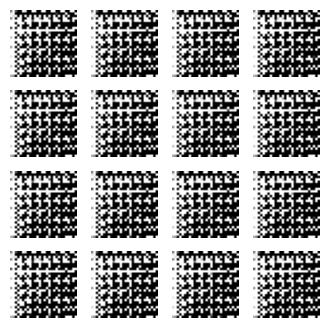

Epoch 2, d_loss: 1.9028711318969727, g_loss: 0.33442753553390503


KeyboardInterrupt: 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
# Load the MNIST dataset
(X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()

# Normalize the images to the range [-1, 1]
X_train = X_train.astype('float32') / 127.5 - 1.0
X_train = np.expand_dims(X_train, axis=-1)

# Constants
BUFFER_SIZE = 60000
BATCH_SIZE = 256
# Generator model
def build_generator():
    model = Sequential()
    model.add(Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(LeakyReLU())
    model.add(Reshape((7, 7, 256)))
    model.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(LeakyReLU())
    model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(LeakyReLU())
    model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    return model

# Discriminator model
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(1))
    return model
# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(1e-4), metrics=['accuracy'])

# Build the generator
generator = build_generator()

# Create the GAN
gan = Sequential([generator, discriminator])

# Compile the GAN
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer=Adam(1e-4))
# Define the loss function and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

generator_optimizer = Adam(1e-4)
discriminator_optimizer = Adam(1e-4)

# Function to train the discriminator
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, 100])

    with tf.GradientTape() as disc_tape, tf.GradientTape() as gen_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        d_loss_real = cross_entropy(tf.ones_like(real_output), real_output)
        d_loss_fake = cross_entropy(tf.zeros_like(fake_output), fake_output)
        d_loss = d_loss_real + d_loss_fake

        g_loss = cross_entropy(tf.ones_like(fake_output), fake_output)

    gradients_of_discriminator = disc_tape.gradient(d_loss, discriminator.trainable_variables)
    gradients_of_generator = gen_tape.gradient(g_loss, generator.trainable_variables)

    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

    return d_loss, g_loss

# Function to generate and save images
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

# Training function
def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            d_loss, g_loss = train_step(image_batch)

        # Generate and save images at the end of each epoch
        generate_and_save_images(generator, epoch + 1, seed)

        print(f'Epoch {epoch+1}, d_loss: {d_loss.numpy()}, g_loss: {g_loss.numpy()}')

# Prepare the dataset
train_dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Seed for visualization
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, 100])

# Train the GAN
EPOCHS = 50
train(train_dataset, EPOCHS)
# Generate some images after training
noise = tf.random.normal([num_examples_to_generate, 100])
generate_and_save_images(generator, EPOCHS, noise)


11. Implement a convolutional neural network to detect objects in images.

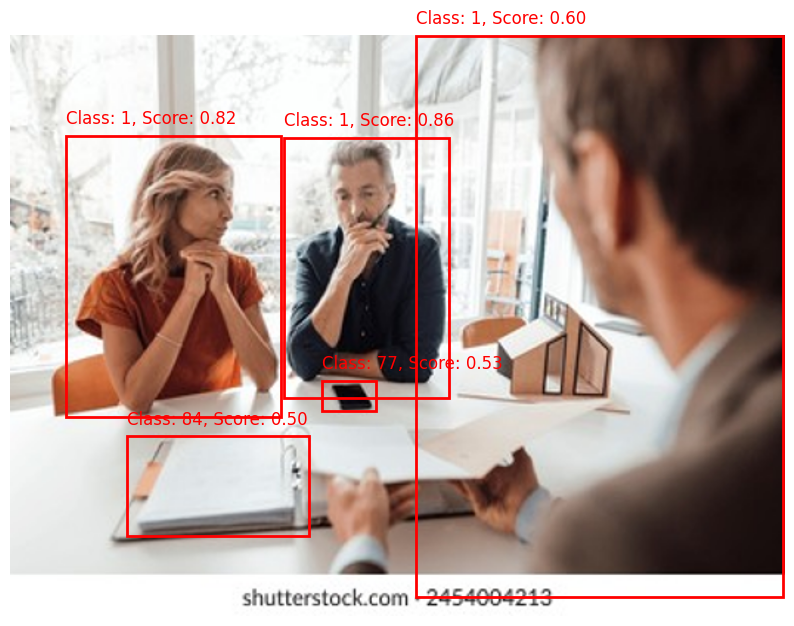

In [ ]:
!pip install tensorflow
!pip install tensorflow-hub
!pip install matplotlib
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError
import requests
from io import BytesIO
def load_image(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check if the request was successful
        img = Image.open(BytesIO(response.content))
        img = img.resize((640, 480))
        img = np.array(img)  # Convert to numpy array
        return img
    except UnidentifiedImageError:
        print(f"Error: Cannot identify image file from the URL: {url}")
        return None
    except requests.RequestException as e:
        print(f"Error: Failed to load image from the URL: {url}\n{e}")
        return None

# URL of the image to be tested
image_url = "https://image.shutterstock.com/image-photo/mature-couple-discussing-over-documents-260nw-2454004213.jpg"
image = load_image(image_url)

# Proceed only if the image is successfully loaded
if image is not None:
    # Convert the image to uint8
    input_tensor = tf.convert_to_tensor(image, dtype=tf.uint8)
    input_tensor = input_tensor[tf.newaxis, ...]  # Add batch dimension

    # Load the pre-trained object detection model from TensorFlow Hub
    model = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

    # Run inference
    detections = model(input_tensor)

    # Extract detection results
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # Detection classes should be integers
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    # Function to visualize detection results
    def visualize_results(image, detections, detection_threshold=0.5):
        plt.figure(figsize=(10, 10))
        plt.imshow(image)

        # Get the bounding boxes, classes and scores
        bboxes = detections['detection_boxes']
        classes = detections['detection_classes']
        scores = detections['detection_scores']

        # Filter out detections with low confidence
        for bbox, cls, score in zip(bboxes, classes, scores):
            if score < detection_threshold:
                continue
            ymin, xmin, ymax, xmax = bbox
            (left, right, top, bottom) = (xmin * image.shape[1], xmax * image.shape[1],
                                          ymin * image.shape[0], ymax * image.shape[0])
            plt.gca().add_patch(plt.Rectangle((left, top), right - left, bottom - top,
                                              edgecolor='red', facecolor='none', linewidth=2))
            plt.text(left, top - 10, f'Class: {cls}, Score: {score:.2f}', color='red', fontsize=12)
        plt.axis('off')
        plt.show()

    # Visualize the results
    visualize_results(image, detections)
else:
    print("Image could not be loaded. Please check the URL or try a different image.")


12. Train a neural network to recognize speech.

In [33]:
!pip install pydub
import os
import librosa   # for audio processing
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")
dataset, info = tfds.load('speech_commands', with_info=True, as_supervised=True)
train_dataset = dataset['train']
test_dataset = dataset['test']

commands = np.array(info.features['label'].names)
print("Commands:", commands)
# Step 2: Data Preprocessing

def preprocess_audio(audio, label):
    audio = tf.squeeze(audio)
    audio = tf.numpy_function(lambda x: librosa.resample(x.astype(np.float32), orig_sr=16000, target_sr=16000), [audio], tf.float32)
    audio = tf.cond(
        tf.shape(audio)[0] < 16000,
        lambda: tf.pad(audio, [[0, 16000 - tf.shape(audio)[0]]]),  # Pad if less than 16000 samples
        lambda: audio[:16000]  # Truncate if more than 16000 samples
    )
    audio = tf.reshape(audio, [16000, 1])
    label = tf.one_hot(label, depth=len(commands))
    return audio, label

train_dataset = train_dataset.map(preprocess_audio)
test_dataset = test_dataset.map(preprocess_audio)

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Step 3: Build the Model

from keras import backend as K
K.clear_session()

inputs = Input(shape=(16000, 1))  # Adjusted to 16000 samples

# First Conv1D layer
conv = Conv1D(8, 13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

# Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

# Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

# Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

# Flatten layer
conv = Flatten()(conv)

# Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

# Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(commands), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 4: Train the Model

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001)
mc = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

try:
    history = model.fit(train_dataset, epochs=100, validation_data=test_dataset, callbacks=[es, mc])
except Exception as e:
    print("Error during model training:", e)
    raise  # Rethrow the error to see full traceback


# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Step 5: Evaluate the Model

from keras.models import load_model

model = load_model('best_model.hdf5')

def predict(audio):
    prob = model.predict(tf.expand_dims(audio, axis=0))  # Ensure input shape matches
    index = np.argmax(prob[0])
    return commands[index]

# Test the model with a random sample from the test dataset
for audio, label in test_dataset.take(1):
    audio_np = audio.numpy()  # Convert TensorFlow tensor to NumPy array
    label_np = label.numpy()  # Convert TensorFlow tensor to NumPy array
    print("True Label:", commands[np.argmax(label_np)])
    print("Predicted Label:", predict(audio_np))

# Step 6: Real-Time Inference

import sounddevice as sd
import soundfile as sf

samplerate = 16000
duration = 1  # seconds
filename = 'output.wav'

print("Start recording")
mydata = sd.rec(int(samplerate * duration), samplerate=samplerate, channels=1, blocking=True)
print("Recording finished")
sd.wait()
sf.write(filename, mydata, samplerate)

samples, sample_rate = librosa.load(filename, sr=16000)
samples = librosa.resample(samples, 16000, 16000)  # No need to resample here
samples = np.expand_dims(samples, axis=-1)  # Add channel dimension for compatibility
print("Predicted text:", predict(samples))



Commands: ['down' 'go' 'left' 'no' 'off' 'on' 'right' 'stop' 'up' 'yes' '_silence_'
 '_unknown_']
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16000, 1)]        0         
                                                                 
 conv1d (Conv1D)             (None, 15988, 8)          112       
                                                                 
 max_pooling1d (MaxPooling1  (None, 5329, 8)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 5329, 8)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 5319, 16)          1424      
                                                                 
 max_pooling1d_1 (MaxPoolin  

KeyboardInterrupt: 

13. Implement a reinforcement learning algorithm to play a game.

Episode 0: Total Reward: 11.0
Episode 100: Total Reward: 19.0
Episode 200: Total Reward: 9.0
Episode 300: Total Reward: 23.0
Episode 400: Total Reward: 19.0
Episode 500: Total Reward: 13.0
Episode 600: Total Reward: 10.0
Episode 700: Total Reward: 31.0
Episode 800: Total Reward: 10.0
Episode 900: Total Reward: 14.0
Average Reward over 100 episodes: 36.22


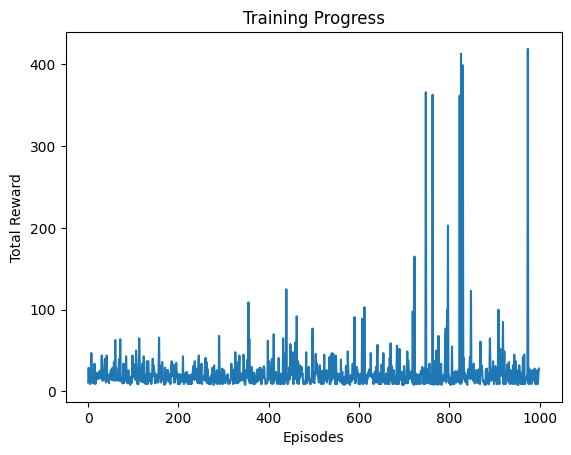

In [18]:
!pip install gym
import gym
import numpy as np
import matplotlib.pyplot as plt
env = gym.make('CartPole-v1')
class QLearningAgent:
    def __init__(self, state_bins, action_space, learning_rate=0.1, discount_factor=0.99, exploration_rate=1.0, exploration_decay=0.995, exploration_min=0.01):
        self.state_bins = state_bins
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.exploration_min = exploration_min
        self.q_table = np.zeros(state_bins + (action_space,))

    def discretize_state(self, state):
        upper_bounds = [env.observation_space.high[0], 0.5, env.observation_space.high[2], np.radians(50)]
        lower_bounds = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -np.radians(50)]
        ratios = [(state[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(state))]
        new_state = [int(round((self.state_bins[i] - 1) * ratios[i])) for i in range(len(state))]
        new_state = [min(self.state_bins[i] - 1, max(0, new_state[i])) for i in range(len(state))]
        return tuple(new_state)

    def choose_action(self, state):
        if np.random.rand() < self.exploration_rate:
            return np.random.choice(self.action_space)
        return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.discount_factor * self.q_table[next_state][best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.learning_rate * td_error

    def decay_exploration_rate(self):
        if self.exploration_rate > self.exploration_min:
            self.exploration_rate *= self.exploration_decay
def train_agent(env, agent, episodes=1000):
    rewards = []
    for episode in range(episodes):
        state = env.reset()
        state = agent.discretize_state(state)
        total_reward = 0
        done = False
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done, _ = env.step(action)
            next_state = agent.discretize_state(next_state)
            agent.update_q_table(state, action, reward, next_state)
            state = next_state
            total_reward += reward
        agent.decay_exploration_rate()
        rewards.append(total_reward)
        if episode % 100 == 0:
            print(f"Episode {episode}: Total Reward: {total_reward}")
    return rewards

state_bins = (24, 24, 24, 24)  # Discretize the state space into 24 bins each for all 4 features
action_space = env.action_space.n
agent = QLearningAgent(state_bins, action_space)
rewards = train_agent(env, agent, episodes=1000)
def evaluate_agent(env, agent, episodes=100):
    total_rewards = []
    for episode in range(episodes):
        state = env.reset()
        state = agent.discretize_state(state)
        total_reward = 0
        done = False
        while not done:
            action = np.argmax(agent.q_table[state])
            next_state, reward, done, _ = env.step(action)
            next_state = agent.discretize_state(next_state)
            state = next_state
            total_reward += reward
        total_rewards.append(total_reward)
    return total_rewards

evaluation_rewards = evaluate_agent(env, agent, episodes=100)
print(f"Average Reward over 100 episodes: {np.mean(evaluation_rewards)}")
plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Training Progress')
plt.show()

